## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
forest_fires = pd.read_csv('forestfires.csv')
forest_fires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## EDA

### Overview of Data

In [3]:
forest_fires.shape

(517, 31)

In [4]:
forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
forest_fires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
forest_fires.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

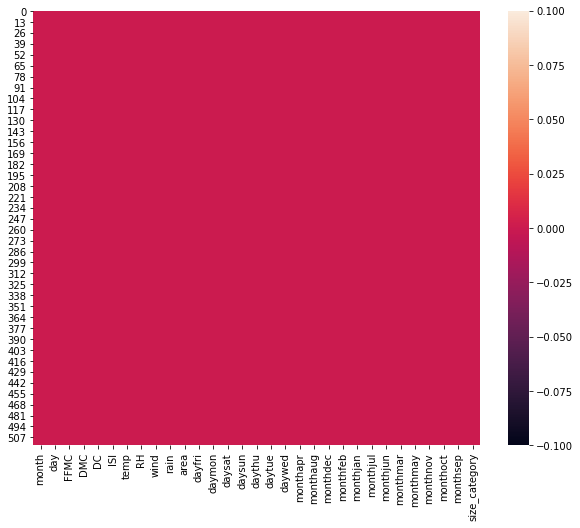

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(forest_fires.isnull())
plt.show()

##### No null value found.

In [8]:
forest_fires.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

#### Dropping Unnecessary Columns

In [9]:
forest_fires.drop(forest_fires.iloc[:,0:2], axis=1, inplace=True)
forest_fires

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


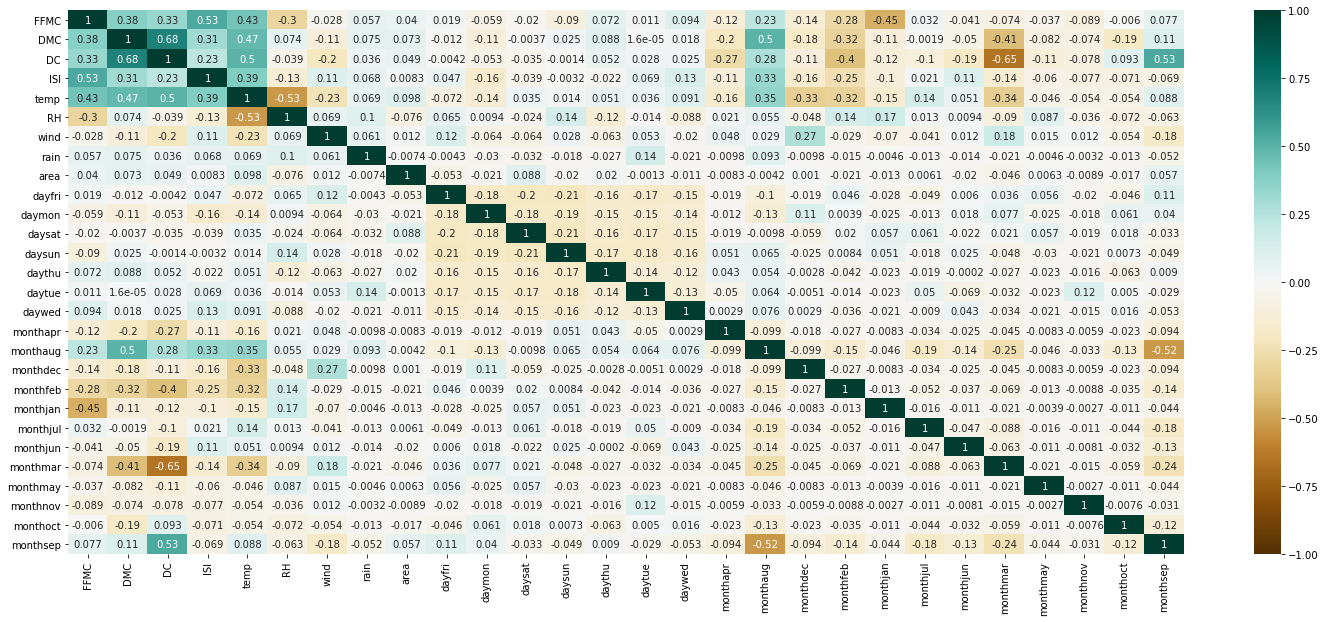

In [10]:
plt.figure(figsize=(25,10))
sns.heatmap(forest_fires.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

#### No correlation observed in the features

### Encoding of size_category columns since it contains string.

In [11]:
lab_en = LabelEncoder()
forest_fires['size_category'] = lab_en.fit_transform(forest_fires['size_category'])
forest_fires

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
forest_fires_boxplot = forest_fires.loc[:,:'area']
forest_fires_boxplot.shape

(517, 9)

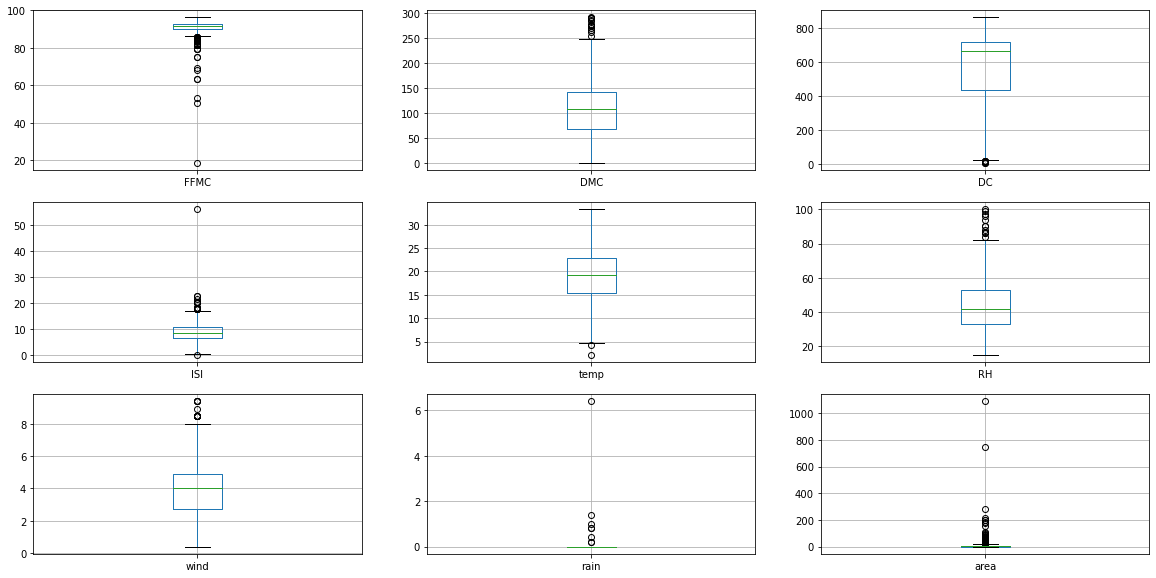

In [13]:
forest_fires_boxplot.plot(kind = 'box', layout = (3,3), figsize = (20,10), subplots = True, grid = True)
plt.show()

### Splitting data into features & labels

In [14]:
x = forest_fires.iloc[:,:-1]
y = forest_fires.iloc[:,-1]
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

### Standardizing the features since there is huge difference in the value ranges.

In [16]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x)
x_std = pd.DataFrame(x_std, columns=x.columns[:])
x_std

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,2.254407,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,2.254407,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081


### Splitting into train-test

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3, random_state=40)
x_train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
240,-0.479563,-1.463985,-2.035459,-1.146342,-0.635953,0.411724,-0.736124,-0.073268,-0.202020,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,-0.706081
185,0.064430,0.291128,0.583715,-0.443828,-0.222232,0.105008,-0.512650,-0.073268,-0.091318,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,1.416268
447,0.499625,-1.462422,-2.096792,0.192826,-1.721971,-0.569770,2.224904,-0.073268,-0.202020,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.17286,-0.706081
188,0.028164,-1.077954,-1.850249,-0.246245,-0.963482,-0.140366,-1.741756,-0.073268,-0.085657,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.17286,-0.706081
142,-0.098768,-0.044891,-0.073197,0.763619,0.398350,0.411724,2.727720,-0.073268,-0.192428,2.254407,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,-0.706081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,-0.062501,2.799547,1.240224,-0.356013,-0.463569,0.841128,-0.233308,-0.073268,-0.202020,2.254407,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,1.416268
165,-1.041690,-1.448356,-1.989056,-1.321971,-2.342553,1.577248,0.269509,-0.073268,-0.168369,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.17286,-0.706081
7,0.155096,0.539625,0.243154,0.368455,-1.877117,2.558742,-1.015466,-0.073268,-0.202020,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,-0.706081
219,-0.098768,-1.112337,-1.861547,-0.619456,-0.635953,-1.060516,-0.512650,-0.073268,0.298969,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.17286,-0.706081


In [18]:
y_train.value_counts()

1    258
0    103
Name: size_category, dtype: int64

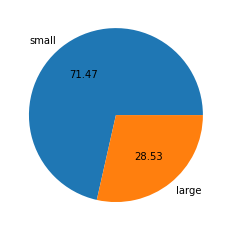

In [19]:
plt.pie(y_train.value_counts(), labels=('small', 'large'), autopct='%0.2f', )
plt.show()

## Building Model 

### Tuning of model

In [20]:
model = SVC()
C = range(1,10)
gamma = range(1, 10)
param_grid = [{'kernel' : ['linear', 'poly'], 'C': C, 'gamma': gamma}]
grid = GridSearchCV(model, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': range(1, 10), 'gamma': range(1, 10),
                          'kernel': ['linear', 'poly']}])

In [21]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 9, 'gamma': 1, 'kernel': 'linear'}
0.9612633181126332


### Fitting & evaluating final model after tuning  

In [22]:
model_final = SVC(C=9, kernel='linear', gamma=1)
model_final.fit(x_train, y_train)

SVC(C=9, gamma=1, kernel='linear')

In [23]:
y_train_pred = model_final.predict(x_train)
print('Accuracy score of trained data : ' , round(accuracy_score(y_train, y_train_pred), 4)*100 )

Accuracy score of trained data :  98.06


In [24]:
print(confusion_matrix(y_train, y_train_pred))

[[ 99   4]
 [  3 255]]


In [25]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       103
           1       0.98      0.99      0.99       258

    accuracy                           0.98       361
   macro avg       0.98      0.97      0.98       361
weighted avg       0.98      0.98      0.98       361



### Validation of final model

In [26]:
y_test_pred = model_final.predict(x_test)
print('Accuracy score of trained data : ' , round(accuracy_score(y_test, y_test_pred), 4)*100 )

Accuracy score of trained data :  97.44


In [27]:
print(confusion_matrix(y_test, y_test_pred))

[[ 34   2]
 [  2 118]]


In [28]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.98      0.98      0.98       120

    accuracy                           0.97       156
   macro avg       0.96      0.96      0.96       156
weighted avg       0.97      0.97      0.97       156

